# A heading
#### smaller heading

this is just text $c = \sqrt{a^2+b^2}$. on its own line:
$$
E=mc^2
$$
you can also do lists:
- first
- second
- third
and that's it. Here is a [link to a guide on basic markdown](https://www.markdownguide.org/getting-started/)

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | \$1600 |
| col 2 is      | centered      |   \$12 |
| zebra stripes | are neat      |    \$1 |

In [18]:
#=
this is a comment
that spans multiple lines
=#
x=2+3
y=1+1;

println("the answer is: ", x+y)

the answer is: 7


Julia can also use unicode symbols. Type \pi and press tab to create the pi character.

In [19]:
2π

6.283185307179586

Other symbols can be defined as variables as well. For example, typing \turtle and tab gives:

In [20]:
🐢 = 5

5

In [21]:
🐢^2

25

Generally speaking, I would not suggest using symbols in code. However, some Julia code will use symbols (such as greek letters), so it is good to understand how it works.

Julia also natively supports vectors and matrices:

In [22]:
x = [1 2 3]

1×3 Matrix{Int64}:
 1  2  3

In [23]:
y = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [24]:
x*y

1-element Vector{Int64}:
 14

In [25]:
A = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [26]:
A = []

Any[]

In [27]:
push!(A, "hello")

1-element Vector{Any}:
 "hello"

In [28]:
push!(A, rand(2,3))

2-element Vector{Any}:
 "hello"
 [0.5007114566458504 0.23687645426574666 0.6793424115143999; 0.33529264105721857 0.2615726145669871 0.6265819531865164]

In [29]:
push!(A, A)

3-element Vector{Any}:
 "hello"
 [0.5007114566458504 0.23687645426574666 0.6793424115143999; 0.33529264105721857 0.2615726145669871 0.6265819531865164]
 3-element Vector{Any}:#= circular reference @-1 =#

We can also create arrays using the range functionality:

In [30]:
x = 1:5
y = 10:-2:0

for i in x
    print(i, " ")
end
println("")
for j in y
    print(j, " ")
end

1 2 3 4 5 
10 8 6 4 2 0 

We can use this functionality to make writing loops easier.

In [31]:
x = [3 4 5 6 7]
for i in 1:4
    println(x[i]*x[i+1])
end

12
20
30
42


We can generate vectors of uniformly random variables with:

In [32]:
x = rand(5)

5-element Vector{Float64}:
 0.9739325714579524
 0.5780285451488603
 0.3806821447865869
 0.8321497714245967
 0.1713195319718135

In [33]:
for i in 3:5
    println(x[i])
end

0.3806821447865869
0.8321497714245967
0.1713195319718135


There are some special vectors in Julia.

In [34]:
x = ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [35]:
y = zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

We can also create the identity matrix using these vectors with the LinearAlgebra package.

In [36]:
#If you have not used LinearAlgebra before, call
#using Pkg
#Pkg.add("LinearAlgebra")

using LinearAlgebra
I = diagm(ones(3))

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

Another useful type of data structure in Julia is dictionaries. Dictionaries map a key to a value. For example:

In [37]:
mydictionary = Dict([("A",1),("B",2)])
mydictionary["B"]

2

We can also add elements to our dictionary over time.

In [38]:
mydictionary["C"] = 3
for (key, value) in mydictionary
    println("key = ", key, " value = ", value)
end

println(mydictionary["C"])

key = B value = 2
key = A value = 1
key = C value = 3
3


We will also use another type of data structure to organize code sometimes, called a NamedArray, which enables us to label the rows and columns of a matrix (or array).

Recall the farm production planning problem from the second lecture:

The labor and fertilizer required for each acre are given in the following table:

|       | Wheat         | Corn  |
| :---------: |:----------:| :--------:|
| Labor (# of workers) | 3 |     2     |
| Fertilizer (tons)  | 2   |     4     |

In [39]:
#If you haven't used NamedArrays before, run
#using Pkg
#Pkg.add("NamedArrays")
using NamedArrays

types = [:wheat, :corn]
resources = [:labor, :fertilizer]

matrix = [3 2; 2 4]

namedmatrix = NamedArray( matrix, (resources,types), ("resource","type") )

2×2 Named Matrix{Int64}
resource ╲ type │ wheat   corn
────────────────┼─────────────
labor           │     3      2
fertilizer      │     2      4

In [40]:
for i in resources
    println(namedmatrix[i,:wheat])
end

println("Corn requires ", namedmatrix[:labor,:corn], " workers per acre.")

3
2
Corn requires 2 workers per acre.


Plotting is also relatively easy in Julia.

┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends.jl:43


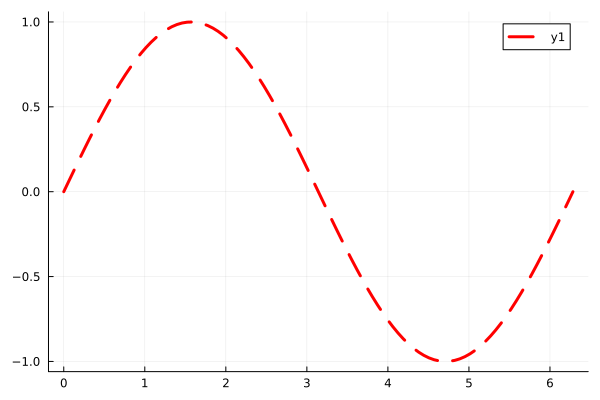

In [41]:
#If you haven't used Plots before, run
#using Pkg
#Pkg.add("Plots")
using Plots

x = LinRange(0,2π, 100)
y = sin.(x)
plot(x,y,linestyle=:dash,linecolor=:red,linewidth=3)